In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 250
pd.options.display.max_rows = 300

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import plot_roc_curve
import matplotlib as plt

from xgboost import XGBClassifier

import xgboost as xgb

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_Df64byy.csv to train_Df64byy.csv
Saving test_YCcRUnU.csv to test_YCcRUnU.csv


In [ ]:
train_df = pd.read_csv('/content/train_Df64byy.csv')
test_df = pd.read_csv('/content/test_YCcRUnU.csv')

In [ ]:
test_df2 = pd.read_csv('/content/test_YCcRUnU.csv')
test_df2.drop(test_df2.columns.difference(['ID']), 1, inplace=True)

In [ ]:
train_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [ ]:
train_df.isnull().sum().sort_values(ascending = False)

Holding_Policy_Type        20251
Holding_Policy_Duration    20251
Health Indicator           11691
Response                       0
Reco_Policy_Premium            0
Reco_Policy_Cat                0
Is_Spouse                      0
Lower_Age                      0
Upper_Age                      0
Reco_Insurance_Type            0
Accomodation_Type              0
Region_Code                    0
City_Code                      0
ID                             0
dtype: int64

In [ ]:
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].replace(['14+'],'14.0')
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].replace(['14+'],'14.0')

In [ ]:
train_df['Holding_Policy_Duration']

0        14.0
1         NaN
2         1.0
3        14.0
4         3.0
         ... 
50877     NaN
50878     7.0
50879    14.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: object

In [ ]:
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].astype('float64')
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].astype('float64')

In [ ]:
cls_to_encode = set(train_df.columns) - set(train_df._get_numeric_data().columns)

def ohe(df,cls_to_encode):
    df = pd.get_dummies(df,columns=cls_to_encode,drop_first=True)
    return df

train_df = ohe(train_df,cls_to_encode)
test_df = ohe(test_df,cls_to_encode)

In [ ]:
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())

In [ ]:
train_df.head()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Reco_Insurance_Type_Joint,Accomodation_Type_Rented,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Is_Spouse_Yes,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,1,3213,36,36,14.0,3.0,22,11628.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1117,75,22,5.0,3.0,22,30510.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,3732,32,32,1.0,1.0,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,4378,52,48,14.0,3.0,19,17780.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2190,44,44,3.0,1.0,16,10404.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = train_df.drop('Response',axis=1)
y = train_df.Response

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = pd.DataFrame(X_sm)
X.columns = ['var' + str(i) for i in range(1, 55)]
y = pd.Series(y_sm)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

model = XGBClassifier()
model.fit(X_train, y_train)

calibrated = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrated.fit(X_test, y_test)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=3,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=

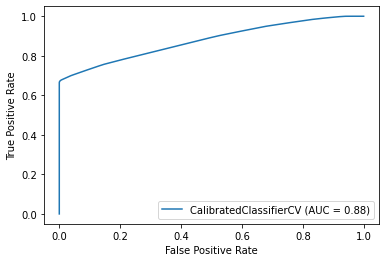

In [ ]:
plot_roc_curve(calibrated, X_test, y_test)

In [ ]:
responses1 = calibrated.predict_proba(test_df)[:, 1]

In [ ]:
print(responses1)

[0.35182485 0.35182485 0.23985682 ... 0.00404858 0.19111969 0.12643678]


In [ ]:
test_df2["Response"]=responses1

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
test_df2.to_csv('drive/My Drive/hack/result_final.csv',index=False)